# Practica Final Machine Learning

# Importar biblitoecas y datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Airbnb_listings_extract_2.csv",sep=",",low_memory=False)
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,2.017030e+13,07.03.17,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,2.017040e+13,08.04.17,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,2.017040e+13,08.04.17,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,2.017040e+13,08.04.17,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,2.017040e+13,08.04.17,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


# Análisis descriptivo de los datos

##### Antes de proceder con el análisis descrpitivo de los datos se hace una eliminación de las variables que no aportan información para este estudio.

##### Dichas variables son: ID, Listing URL, Scrape ID, Last Scraped, Name,Summary, Space, Description, Neighbourhood Overview, Notes, Transit, Access, Interaction, House Rules, Thumbnail URL, Medium URL, Picture URL, XL Picture URL, Host ID, Host URL, Host Location, Host About, Host Response Time,Host Response Rate, Host Acceptance Rate, Host Thumbnail URL, Host Picture URL, Host Neighbourhood, Host Listings Count, Host Total Listings Count, Street, Neighbourhood, Neighbourhood Cleansed,State, Market, Smart Location, Country, Latitude, Longitude, Extra people, Calendar Updated, Has availabiliy, Calendar last scraped, First Review, Last Review, License, Jurisdiction Names, Geolocation, Reviews per month.

##### Motivos: Como se puede apreciar son variables categóricas que entre usuraios no siguen ningún esquema de respuesta y que no inciden en el precio de alquiler. 

##### Muchas de estas variables tienen su versión numérica en otras. Por ejemplo, "Neighbourhood", "Neighbourhood Cleansed" y "Neighbourhood Group Cleansed", siendo esta última la que no descartamos ya que nos da la misma información de manera ordenada que podemos tratar.

In [64]:
#Renombrar variables para poder hacer el conteo y decidir si las mantenemos o las quitamos del dataset.
data_new = data.rename(columns={'Experiences Offered': 'Experiences_offered', 
                                "Host Acceptance Rate":"Host_acceptance_rate", 
                                "Host Total Listings Count": "host_total_listings_count", 
                                "Host Listings Count": "host_listings_count",
                               "Neighbourhood Cleansed": "Neighbourhood_cleansed",
                               "Neighbourhood Group Cleansed": "Neighbourhood_group_cleansed",
                               "Guests Included": "Guests_included",
                               "Availability 30": "Availability_30",
                                "Bed Type": "Bed_type",
                               "Calendar Updated": "Calendar_updated", 
                               "Has Availability": "Has_availability",
                                "Calculated host listings count":"Calculated_host_listings_count",
                               "Extra People": "Extra_people", "Weekly Price": "Weekly_price", "Monthly Price": "Monthly_price",
                               "Host Name": "Host_Name", "Host Verifications": "Host_Verifications"}) #change a from A

In [65]:
data_new.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences_offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated_host_listings_count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,2.017030e+13,07.03.17,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,2.017040e+13,08.04.17,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,2.017040e+13,08.04.17,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,2.017040e+13,08.04.17,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,2.017040e+13,08.04.17,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


# Todos estos son overviews de como son las variables para ver si las descartabamos o no. 
# Lo podemos quitar pero lo dejo por si quereis mirarlo

In [66]:
data_new.Experiences_offered.value_counts()

none        14763
business        8
family          3
social          3
romantic        3
Name: Experiences_offered, dtype: int64

In [67]:
data_new.Host_acceptance_rate.value_counts()

100%    23
74%      2
0%       2
96%      2
80%      2
85%      2
83%      1
67%      1
44%      1
97%      1
95%      1
88%      1
Name: Host_acceptance_rate, dtype: int64

In [68]:
data_new.host_total_listings_count.value_counts()

1.0      6353
2.0      2297
3.0      1212
4.0       752
5.0       424
         ... 
63.0        1
519.0       1
265.0       1
81.0        1
50.0        1
Name: host_total_listings_count, Length: 56, dtype: int64

In [69]:
data_new.host_listings_count.value_counts()

1.0      6353
2.0      2297
3.0      1212
4.0       752
5.0       424
         ... 
63.0        1
519.0       1
265.0       1
81.0        1
50.0        1
Name: host_listings_count, Length: 56, dtype: int64

In [70]:
data_new.Neighbourhood.value_counts()

MalasaÃ±a      895
La Latina      810
Embajadores    795
Sol            716
Justicia       559
              ... 
WÃ¤hring         1
Camden Town      1
DÃ¶bling         1
Rosebery         1
Ravenna          1
Name: Neighbourhood, Length: 390, dtype: int64

In [71]:
data_new.Neighbourhood_cleansed.value_counts()

Embajadores               1849
Universidad               1363
Palacio                   1084
Sol                        942
Justicia                   789
                          ... 
Alt  Treptow                 1
WÂŠhring                     1
DÂšbling                     1
Frankfurter Allee Nord       1
Ravenna                      1
Name: Neighbourhood_cleansed, Length: 478, dtype: int64

In [72]:
data_new.Neighbourhood_group_cleansed.value_counts()

Centro                     6780
ChamberÃ­                   960
Salamanca                   883
Arganzuela                  793
TetuÃ¡n                     464
                           ... 
Treptow - KÃ¶penick           1
Magnolia                      1
Tempelhof - SchÃ¶neberg       1
Ballard                       1
Spandau                       1
Name: Neighbourhood_group_cleansed, Length: 49, dtype: int64

In [73]:
data_new.Accommodates.value_counts()

2     5257
4     3275
1     2056
3     1421
6     1200
5      712
8      327
7      200
10     116
9       70
12      56
16      44
11      25
14      13
15       5
13       3
Name: Accommodates, dtype: int64

In [74]:
data_new.Guests_included.value_counts()

1     9738
2     3475
4      757
3      444
6      144
5      104
8       44
7       30
10      13
12      10
9        8
16       6
15       4
14       2
0        1
Name: Guests_included, dtype: int64

In [75]:
data_new.Bed_type.value_counts()

Real Bed         14456
Pull-out Sofa      258
Futon               42
Couch               19
Airbed               5
Name: Bed_type, dtype: int64

In [76]:
data_new.Calendar_updated.value_counts()

today            3924
yesterday        1212
2 weeks ago      1212
a week ago       1140
3 days ago        842
                 ... 
35 months ago       1
27 months ago       1
57 months ago       1
58 months ago       1
37 months ago       1
Name: Calendar_updated, Length: 57, dtype: int64

In [77]:
data_new.Has_availability.value_counts()

t    12
Name: Has_availability, dtype: int64

In [78]:
data_new.Calculated_host_listings_count.value_counts()

1.0      6990
2.0      2171
3.0      1099
4.0       710
5.0       432
         ... 
25.0       25
17.0       25
24.0       20
106.0      17
65.0        2
Name: Calculated_host_listings_count, Length: 45, dtype: int64

In [79]:
data_new.Extra_people.value_counts()

0      7598
10     1996
15     1477
20      934
5       573
       ... 
4         1
178       1
145       1
274       1
276       1
Name: Extra_people, Length: 68, dtype: int64

# Se eliminan las variables que no son relevantes para el estudio

In [80]:
# Se eliminan las variables que no vamos a usar en el dataset

data_new_1=data_new.drop(columns=["ID", "Listing Url","Scrape ID","Last Scraped","Name",
                           'Summary','Space','Description','Neighborhood Overview','Notes','Transit','Access',
                          'Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url',
                          'Host ID', "Host Location", "Host About", "Host Response Time", "Host Response Rate",
                            "Host_acceptance_rate", "Host Thumbnail Url", "Host Picture Url", "Host Neighbourhood",
                            "host_listings_count", "host_total_listings_count", "Street", "Neighbourhood", "Neighbourhood_cleansed",
                            "Market", "Smart Location", "Country", "Latitude", "Longitude", "Extra_people", "Calendar_updated",
                            "Has_availability", "Calendar last Scraped", "First Review", "Last Review", "License", "Jurisdiction Names",
                            "Geolocation", "Reviews per Month", "Host URL", "State", "Weekly_price", "Monthly_price"], axis=2)
data_new_1.head()

,Experiences_offered,Host_Name,Host Since,Host_Verifications,Neighbourhood_group_cleansed,City,Zipcode,Country Code,Property Type,Room Type,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated_host_listings_count,Features
0,none,John,11.02.16,"email,phone,reviews,kba",NaN,Austin,78733,US,Loft,Entire home/apt,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,"Host Is Superhost,Host Has Profile Pic,Host Id..."
1,none,Claudia,08.11.16,"email,phone,reviews,work_email",Eixample,Barcelona,8010,ES,Apartment,Entire home/apt,...,80.0,8.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,"Host Has Profile Pic,Requires License,Instant ..."
2,none,Claudia,08.11.16,"email,phone,reviews,work_email",Eixample,Barcelona,8008,ES,Apartment,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,super_strict_30,106.0,"Host Has Profile Pic,Requires License,Instant ..."
3,none,Damien,25.05.10,"email,phone,facebook,reviews,manual_offline,ju...",Eixample,Barcelona,8009,ES,Apartment,Entire home/apt,...,92.0,10.0,9.0,10.0,10.0,10.0,9.0,strict,24.0,"Host Has Profile Pic,Host Identity Verified,Re..."
4,none,Javier,12.01.16,"email,phone,reviews,jumio",Eixample,Barcelona,8036,ES,Apartment,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,92.0,"Host Has Profile Pic,Host Identity Verified,Is..."


# Análisis del DataSet

In [81]:
data_new_1.describe()

,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests_included,Minimum Nights,...,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated_host_listings_count
count,14780.000000,14725.000000,14755.000000,14731.00000,598.000000,14763.000000,6256.000000,8687.000000,14780.000000,14780.000000,...,14780.000000,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000
mean,3.277808,1.281732,1.343816,2.04426,390.456522,73.561471,189.226822,31.805341,1.589986,3.050474,...,202.104465,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871
std,2.097291,0.658517,0.900078,1.61277,637.134930,72.062050,115.151070,30.878599,1.182550,12.266517,...,127.886822,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014
min,1.000000,0.000000,0.000000,1.00000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
25%,2.000000,1.000000,1.000000,1.00000,0.000000,34.000000,100.000000,15.000000,1.000000,1.000000,...,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000
50%,3.000000,1.000000,1.000000,2.00000,98.500000,55.000000,150.000000,25.000000,1.000000,2.000000,...,239.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000
75%,4.000000,1.000000,2.000000,2.00000,646.000000,86.000000,200.000000,40.000000,2.000000,3.000000,...,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000
max,16.000000,8.000000,10.000000,16.00000,6997.000000,999.000000,990.000000,662.000000,16.000000,1125.000000,...,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000


In [82]:
data_new_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences_offered             14780 non-null  object 
 1   Host_Name                       14777 non-null  object 
 2   Host Since                      14777 non-null  object 
 3   Host_Verifications              14774 non-null  object 
 4   Neighbourhood_group_cleansed    13760 non-null  object 
 5   City                            14774 non-null  object 
 6   Zipcode                         14274 non-null  object 
 7   Country Code                    14780 non-null  object 
 8   Property Type                   14780 non-null  object 
 9   Room Type                       14780 non-null  object 
 10  Accommodates                    14780 non-null  int64  
 11  Bathrooms                       14725 non-null  float64
 12  Bedrooms                        

In [83]:
pd.options.display.max_rows = 40

# Conteo de Missings

In [84]:
# Se cuenta el número de valores nulos de cada variable
data_missings = pd.DataFrame(data_new_1.isna().sum())
data_missings

,0
Experiences_offered,0
Host_Name,3
Host Since,3
Host_Verifications,6
Neighbourhood_group_cleansed,1020
City,6
Zipcode,506
Country Code,0
Property Type,0
Room Type,0


In [85]:
# Se muestran las clases de cada variable
data_new_1_types = data_new_1.dtypes
data_new_1_types

Experiences_offered                object
Host_Name                          object
Host Since                         object
Host_Verifications                 object
Neighbourhood_group_cleansed       object
City                               object
Zipcode                            object
Country Code                       object
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed_type                           object
Amenities                          object
Square Feet                       float64
Price                             float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests_included                     int64
Minimum Nights                      int64
Maximum Nights                      int64
Availability_30                   

# Distribución de nuestra variable objetivo: PRICE

In [86]:
#Se puede ver que nuestra varibale objetivo es de tipo floa64 entoces vamos a transformarla en object. 
#data_new_1['Price'] = data_new_1['Price'].astype(str)

In [87]:
# conteo de valores
data_new_1.Price.value_counts()

50.0     656
60.0     576
25.0     548
30.0     544
35.0     478
        ... 
612.0      1
239.0      1
577.0      1
875.0      1
950.0      1
Name: Price, Length: 370, dtype: int64

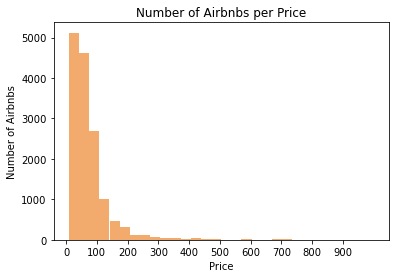

In [88]:
# Se grafica la distribución de los valores que toma la variable objetivo

plt.hist(data_new_1.Price, bins=30, color='#F2AB6D')
plt.xticks(np.arange(0, np.max(data_new_1.Price),100))
plt.xlabel("Price")
plt.ylabel("Number of Airbnbs")
plt.title("Number of Airbnbs per Price")
plt.show()

# Tratamiento de las 39 variables de nuestro análisis

#### Se elimina la variable "Square feet" ya que, aunque es relevante cuenta con 14182 missings.

In [89]:
data_new_1=data_new_1.drop(columns={"Square Feet"})

#### Tratamiento de la variable "Experiences offered" mediante el One Hot Encoder

In [90]:
data_new_1.Experiences_offered.value_counts()

none        14763
business        8
family          3
social          3
romantic        3
Name: Experiences_offered, dtype: int64

In [91]:
columns_dummies = ["Experiences_offered"]
dummies = pd.get_dummies(data_new_1[columns_dummies])
data_new_1 = pd.concat([data_new_1, dummies], axis = 1)
data_new_1 = data_new_1.drop(columns=columns_dummies)

In [92]:
data_new_1.head()

,Host_Name,Host Since,Host_Verifications,Neighbourhood_group_cleansed,City,Zipcode,Country Code,Property Type,Room Type,Accommodates,...,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated_host_listings_count,Features,Experiences_offered_business,Experiences_offered_family,Experiences_offered_none,Experiences_offered_romantic,Experiences_offered_social
0,John,11.02.16,"email,phone,reviews,kba",NaN,Austin,78733,US,Loft,Entire home/apt,2,...,10.0,10.0,moderate,1.0,"Host Is Superhost,Host Has Profile Pic,Host Id...",0,0,1,0,0
1,Claudia,08.11.16,"email,phone,reviews,work_email",Eixample,Barcelona,8010,ES,Apartment,Entire home/apt,4,...,8.0,10.0,super_strict_30,106.0,"Host Has Profile Pic,Requires License,Instant ...",0,0,1,0,0
2,Claudia,08.11.16,"email,phone,reviews,work_email",Eixample,Barcelona,8008,ES,Apartment,Entire home/apt,4,...,NaN,NaN,super_strict_30,106.0,"Host Has Profile Pic,Requires License,Instant ...",0,0,1,0,0
3,Damien,25.05.10,"email,phone,facebook,reviews,manual_offline,ju...",Eixample,Barcelona,8009,ES,Apartment,Entire home/apt,8,...,10.0,9.0,strict,24.0,"Host Has Profile Pic,Host Identity Verified,Re...",0,0,1,0,0
4,Javier,12.01.16,"email,phone,reviews,jumio",Eixample,Barcelona,8036,ES,Apartment,Entire home/apt,5,...,NaN,NaN,flexible,92.0,"Host Has Profile Pic,Host Identity Verified,Is...",0,0,1,0,0


#### Tratamiento de la variable Host Name (Angela: No se yo si deberiamos descartarla al igual que Host Since...)

In [93]:
data_new_1.Host_Name.value_counts()

Javier                 307
Raquel                 219
Ana                    199
Maria                  198
Carlos                 161
                      ... 
Encarni                  1
LaFraguaAudiovisual      1
Birgit                   1
Lara Y Javi              1
Kc                       1
Name: Host_Name, Length: 3276, dtype: int64

#### Tratamiento de la variable Host Verifications

In [94]:
data_new_1.Host_Verifications.value_counts()

email,phone,reviews,jumio                                                        3660
email,phone,reviews                                                              3504
email,phone,facebook,reviews,jumio                                                875
email,phone,reviews,jumio,government_id                                           860
email,phone,facebook,reviews                                                      748
                                                                                 ... 
email,phone,manual_offline                                                          1
email,phone,manual_online,reviews,manual_offline,jumio,government_id                1
email,phone,google,reviews,work_email                                               1
email,phone,reviews,jumio,kba,government_id                                         1
email,phone,facebook,reviews,jumio,offline_government_id,selfie,government_id       1
Name: Host_Verifications, Length: 206, dtype: int64